In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


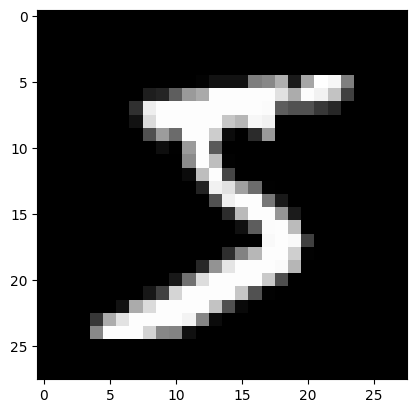

In [ ]:
plt.imshow(x_train[0], cmap='gray')


In [ ]:
plt.show()

In [ ]:
print(x_train[1])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [ ]:
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [ ]:
x_train /= 255 # Each image has Intensity from 0 to 255
x_test /= 255

In [ ]:
num_classes = 10

In [ ]:
y_train = np.eye(num_classes)[y_train]


In [ ]:
y_test = np.eye(num_classes)[y_test]

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) # Input Layer

model.add(Dropout(0.2))                                      #Hiddden Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))          #Output layer

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])


In [ ]:
batch_size = 128
epochs = 20

In [ ]:
history = model.fit(x_train, y_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 11s 21ms/step - loss: 0.2560 - accuracy: 0.9215 - val_loss: 0.1092 - val_accuracy: 0.9639
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1051 - accuracy: 0.9676 - val_loss: 0.0808 - val_accuracy: 0.9747
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0753 - accuracy: 0.9767 - val_loss: 0.0727 - val_accuracy: 0.9775
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0580 - accuracy: 0.9815 - val_loss: 0.0679 - val_accuracy: 0.9779
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0657 - val_accuracy: 0.9803
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0629 - val_accuracy: 0.9810
Epoch 7/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0605 - val_accuracy: 0.983

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08932225406169891
Test accuracy: 0.9847999811172485


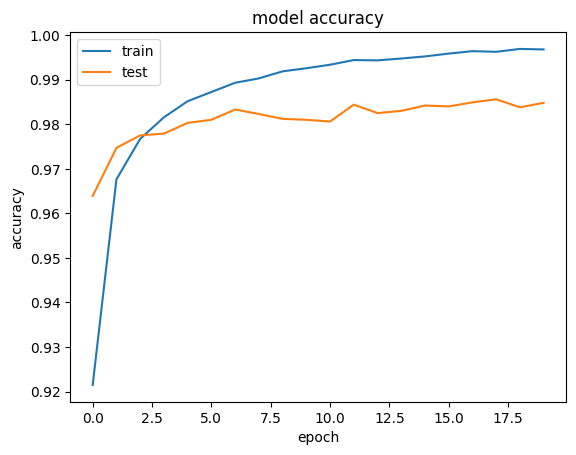

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


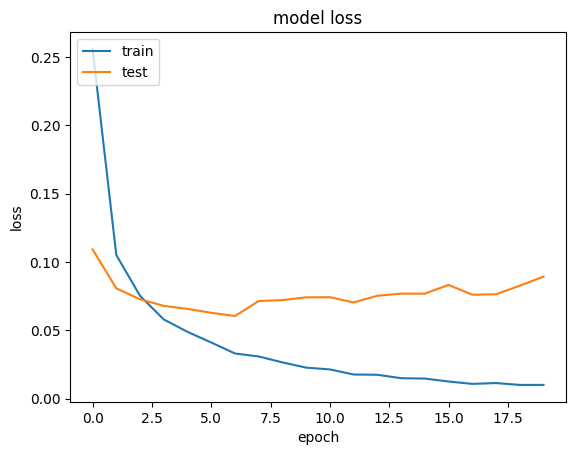

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()